In [3]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
import torch 
import torch.nn.functional as F

In [4]:
df = pd.read_csv("../scraper/extractions/CSV/BySubCats/20250307_094141.csv", engine="python")
df.head()

,id,title,summary,category,authors,published,updated
0,http://arxiv.org/abs/2503.04552v1,Coexistence of distinct mobility edges in a 1D...,We introduce a one-dimensional quasiperiodic m...,cond-mat.dis-nn,"Xu Xia, Weihao Huang, Ke Huang, Xiaolong Deng,...",2025-03-06T15:37:14Z,2025-03-06T15:37:14Z
1,http://arxiv.org/abs/2503.04454v1,Beyond Disorder: Unveiling Cooperativeness in ...,By leveraging tools from the statistical mecha...,cond-mat.dis-nn,"Andrea Alessandrelli, Adriano Barra, Andrea La...",2025-03-06T14:09:30Z,2025-03-06T14:09:30Z
2,http://arxiv.org/abs/2503.04443v1,On the nature of the glass transition in metal...,We performed parallel study of calorimetric an...,cond-mat.dis-nn,"A. S. Makarov, G. V. Afonin, R. A. Konchakov, ...",2025-03-06T13:59:49Z,2025-03-06T13:59:49Z
3,http://arxiv.org/abs/2503.04436v1,Relationship between the shear moduli and defe...,We performed high-frequency shear modulus and ...,cond-mat.dis-nn,"Andrey Makarov, Evgenia Gonchrova, Jichao Qiao...",2025-03-06T13:49:15Z,2025-03-06T13:49:15Z
4,http://arxiv.org/abs/2503.03955v1,Machine Learning Enhanced Calculation of Quant...,Binding free energies are a key element in und...,physics.chem-ph,"Moritz Bensberg, Marco Eckhoff, F. Emil Thomas...",2025-03-05T23:01:35Z,2025-03-05T23:01:35Z


In [5]:
len(df)

1757275

In [6]:
df.describe()

,id,title,summary,category,authors,published,updated
count,1757275,1757275,1757275,1757275,1757275,1757275,1757275
unique,1240392,1239612,1239914,172,980619,1228391,1233802
top,http://arxiv.org/abs/2402.14026v3,Discussion of: A statistical analysis of multi...,This paper has been withdrawn.,cs.LG,ALICE Collaboration,2024-12-11T19:00:00Z,2024-12-02T19:00:00Z
freq,8,14,29,55184,734,35,26


In [7]:
df = df.drop_duplicates(subset="title")
df.describe()


,id,title,summary,category,authors,published,updated
count,1239612,1239612,1239612,1239612,1239612,1239612,1239612
unique,1239612,1239612,1239251,172,980283,1227619,1233026
top,http://arxiv.org/abs/2206.07332v3,Modelling of AC/DC Interactions of Converter-I...,This paper has been withdrawn.,cs.LG,CMS Collaboration,2024-12-11T19:00:00Z,2012-06-27T19:59:59Z
freq,1,1,24,39965,497,18,15


In [8]:
df = df.drop_duplicates(subset="summary")
df.describe()


,id,title,summary,category,authors,published,updated
count,1239251,1239251,1239251,1239251,1239251,1239251,1239251
unique,1239251,1239251,1239251,172,980160,1227259,1232666
top,http://arxiv.org/abs/2206.07332v3,Modelling of AC/DC Interactions of Converter-I...,Power distribution systems experience a large-...,cs.LG,CMS Collaboration,2024-12-11T19:00:00Z,2012-06-27T19:59:59Z
freq,1,1,1,39961,497,18,15


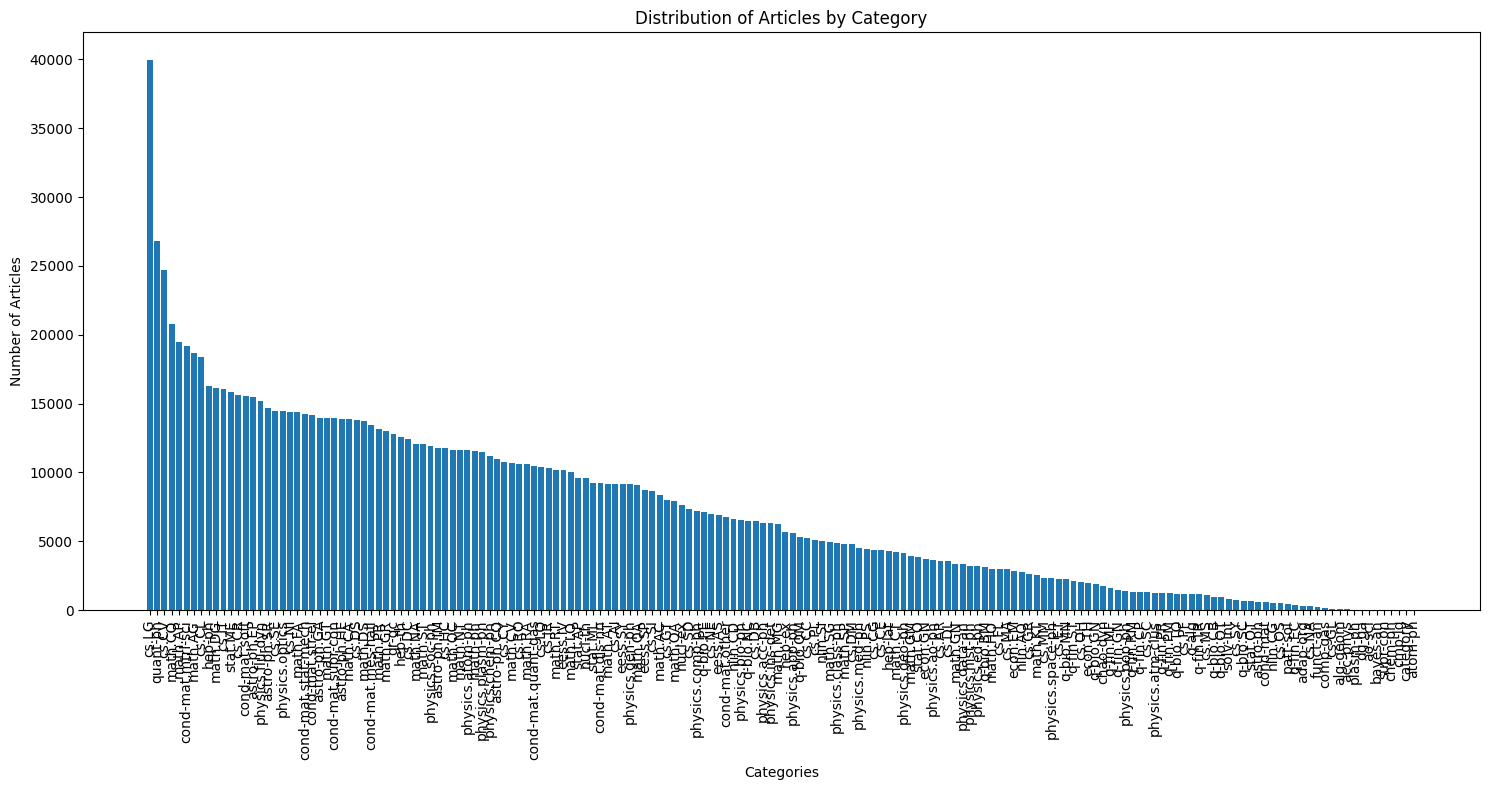

In [9]:
category_counts = df.category.value_counts()
# Create a bar plot
plt.figure(figsize=(15, 8))
plt.bar(category_counts.index, category_counts.values)
plt.xticks(rotation=90)
plt.xlabel('Categories')
plt.ylabel('Number of Articles')
plt.title('Distribution of Articles by Category')

# Add some spacing at the bottom for category labels
plt.tight_layout()

# Display the plot
plt.show()

In [10]:
categories = df.category.unique()
categories, len(categories)

(array(['cond-mat.dis-nn', 'physics.chem-ph', 'cond-mat.stat-mech',
        'cond-mat.soft', 'q-bio.PE', 'quant-ph', 'cs.LG', 'stat.ML',
        'cond-mat.mes-hall', 'q-bio.NC', 'cond-mat.str-el', 'hep-th',
        'physics.data-an', 'math.PR', 'physics.optics',
        'cond-mat.mtrl-sci', 'q-bio.MN', 'cond-mat.supr-con',
        'physics.app-ph', 'math.ST', 'cond-mat.quant-gas',
        'physics.soc-ph', 'q-fin.RM', 'hep-lat', 'cs.IT', 'cs.AI',
        'nlin.CD', 'cs.CL', 'eess.SY', 'nlin.PS', 'math.AP',
        'physics.hist-ph', 'cs.GT', 'gr-qc', 'nlin.AO', 'cs.ET',
        'physics.comp-ph', 'q-bio.BM', 'math-ph', 'cs.SD', 'astro-ph.IM',
        'physics.flu-dyn', 'q-fin.PM', 'math.NA', 'nucl-th', 'cs.CV',
        'physics.bio-ph', 'stat.ME', 'cs.NE', 'physics.geo-ph', 'q-fin.GN',
        'cs.AR', 'physics.atom-ph', 'eess.IV', 'physics.class-ph', 'cs.SI',
        'math.OC', 'physics.med-ph', 'astro-ph.EP', 'math.DS',
        'physics.plasm-ph', 'cond-mat.other', 'astro-ph.CO', 'ee

In [12]:
import re
from collections import Counter

titles = df["title"]
vocab = Counter()
for title in titles:
    # Extraction des mots en minuscules (seulement les caractères alphabétiques)
    words = re.findall(r'[a-z]+', title.lower())
    vocab.update(words)
vocab = dict(vocab)
print(len(vocab))
 

162966


In [13]:
rare_words = [word for word, count in vocab.items() if count < 10]
print(len(rare_words))
for w in rare_words:
    vocab.pop(w, None)
print(len(vocab))

134262
28704


In [14]:
list_of_words = list(vocab.keys())
print(list_of_words[:50])

['coexistence', 'of', 'distinct', 'mobility', 'edges', 'in', 'a', 'd', 'quasiperiodic', 'mosaic', 'model', 'beyond', 'disorder', 'unveiling', 'associative', 'memories', 'on', 'the', 'nature', 'glass', 'transition', 'metallic', 'glasses', 'after', 'deep', 'relaxation', 'relationship', 'between', 'shear', 'moduli', 'and', 'defect', 'induced', 'structural', 'entropy', 'machine', 'learning', 'enhanced', 'calculation', 'quantum', 'classical', 'binding', 'free', 'energies', 'hierarchical', 'embedding', 'by', 'for', 'large', 'molecular']


In [15]:
categories = df.category.unique()

wtoi = {t:i for i,t in enumerate(vocab)} # word to integer 
itow = {i:t for i,t in enumerate(vocab)} # integer to word

ttoi = {t:i for i,t in enumerate(titles)} # title to integer 
itot = {i:t for i,t in enumerate(titles)} # integer to title

ctoi = {c:i for i,c in enumerate(categories)} # category to integer
itoc = {i:c for i,c in enumerate(categories)} # integer to category

In [17]:
def titles_embbeding(titles, C, poolingtype="avg"): 
    titles_emb = []
    for t in titles:
        words = re.findall(r'[a-z]+', t.lower())
        words = [w for w in words if w in wtoi] # make sure the words are in the vocab 

        indices = [wtoi[w] for w in words if w in wtoi]
        word_embeddings = C[indices] # (nbr_words_in_title, emb_dim)
        if poolingtype == "avg":
            emb = word_embeddings.mean(dim=0) # mean 
        elif poolingtype == "max":
            emb = word_embeddings.max(dim=0)[0] # max values without the indices
        else:
            print("Choose between 'avg' and 'max'")
        titles_emb.append(emb)

    titles_emb = torch.stack(titles_emb)
    return titles_emb

# Ex
emb_dim = 10
C = torch.randn((len(vocab), emb_dim))
batch_titles = [itot[i] for i in range(0,5)]
print(titles_embbeding(batch_titles, C, 'avg'))
print(batch_titles)

tensor([[-0.3936,  0.3164,  0.2020, -0.0380,  0.3611, -0.0912, -0.2491, -0.2949,
          0.1531,  0.4761],
        [-0.2956,  0.8560,  0.1637,  0.2213,  0.0740,  0.2049, -1.0772, -0.4520,
         -0.3780,  0.5663],
        [-0.3003,  0.0622,  0.3319, -0.0132, -0.0723, -0.1803,  0.0244, -0.2158,
          0.0231,  0.4030],
        [ 0.1759, -0.3605,  0.2405,  0.3070, -0.3121, -0.6946,  0.3291, -0.2831,
          0.4170, -0.0390],
        [ 0.3289, -0.4707,  0.5244, -0.1239,  0.6308, -1.0116,  0.0210, -0.2464,
          0.3904, -0.4925]])
['Coexistence of distinct mobility edges in a 1D quasiperiodic mosaic\n  model', 'Beyond Disorder: Unveiling Cooperativeness in Multidirectional\n  Associative Memories', 'On the nature of the glass transition in metallic glasses after deep\n  relaxation', 'Relationship between the shear moduli and defect-induced structural\n  relaxation ofhigh-entropy metallic glasses', 'Machine Learning Enhanced Calculation of Quantum-Classical Binding Free\n  Ener

In [18]:
def build_dataset(papers, n1, n2):
    X = [papers.iloc[i]["title"] for i in range(n1, n2)]
    Y = [ctoi[papers.iloc[i]["category"]] for i in range(n1, n2)]
    return X, Y

In [19]:
import random
random.seed(42)
indices = list(range(len(df)))
random.shuffle(indices)
papers_shuffled = df.iloc[indices].reset_index(drop=True) # shuffled dataset 
n1 = int(0.8*len(papers_shuffled))
Xtr, Ytr = build_dataset(papers_shuffled, 0, n1)
Xte, Yte = build_dataset(papers_shuffled, n1, len(papers_shuffled))

In [20]:
print(Xtr[:5])
print(Ytr[:5])

['From $Γ$-spaces to algebraic theories', 'Remarks on the intersection of filters', 'An estimate on the nodal set of eigenspinors on closed surfaces', 'A Coin Has Two Sides: A Novel Detector-Corrector Framework for Chinese\n  Spelling Correction', 'Coulomb corrections to two-particle interaction in artificial traps']
[77, 149, 123, 27, 44]


In [23]:
print([itoc[i] for i in Ytr[:5]])

['math.AT', 'math.LO', 'math.DG', 'cs.CL', 'nucl-th']


In [24]:
nbr_added_layers = 1
nbr_neurons_hidden = [256 for _ in range(nbr_added_layers)]
nbr_neurons_first = 256
nbr_categories = len(categories)
nbr_titles = len(titles)
vocab_size = len(vocab)
emb_dim = 10

g = torch.Generator().manual_seed(2147483647) 
C = torch.randn((vocab_size, emb_dim), generator=g)
W1 = torch.randn((emb_dim, nbr_neurons_first), generator=g) / nbr_neurons_first**0.5 # kaiming init
b1 = torch.randn(nbr_neurons_first, generator=g) * 0.1

Ws = []
bs = []
parameters = [C, W1, b1]
for i in range(0, nbr_added_layers):
    if i == 0:
        W = torch.randn((nbr_neurons_first, nbr_neurons_hidden[i]), generator=g) / nbr_neurons_hidden[i]**0.5
    else : 
        W = torch.randn((nbr_neurons_hidden[i], nbr_neurons_hidden[i]), generator=g) / nbr_neurons_hidden[i]**0.5
    
    b = torch.randn(nbr_neurons_hidden[i], generator=g) * 0.1
    parameters.append(W)
    parameters.append(b)
    Ws.append(W)
    bs.append(b)

Wlast = torch.randn((nbr_neurons_hidden[-1], nbr_categories), generator=g) / nbr_neurons_hidden[-1]**0.5
blast = torch.randn((nbr_categories), generator=g) * 0.1

parameters.append(Wlast)
parameters.append(blast)

for p in parameters:
    print(p.shape)

print(sum(p.nelement() for p in parameters))

torch.Size([28704, 10])
torch.Size([10, 256])
torch.Size([256])
torch.Size([256, 256])
torch.Size([256])
torch.Size([256, 172])
torch.Size([172])
399852


In [25]:
for p in parameters:
        p.requires_grad = True 
stepi, lossi, lri = [], [], []

In [26]:
epochs = 3
batch_size = 32
pooling_type = "avg"
lr = 0.1
max_it = 5000000

# Calculate number of batches per epoch
n_samples = len(Xtr)
n_batches = n_samples // batch_size

it_count = 0
for epoch in range(epochs):
    if it_count >= max_it:
        print(f'Max iterations reached: {max_it}')
        break
        
    # Shuffle training data at the beginning of each epoch
    indices = torch.randperm(n_samples)
    
    # Loop over batches
    for batch_idx in range(n_batches):
        # Get batch indices
        start_idx = batch_idx * batch_size
        end_idx = start_idx + batch_size
        batch_indices = indices[start_idx:end_idx]
        
        # Get the titles for these indices
        batch_titles = [Xtr[idx] for idx in batch_indices]
        batch_labels = torch.tensor([Ytr[idx] for idx in batch_indices])
        
        # Calculate embeddings for these titles using average pooling
        emb = titles_embbeding(batch_titles, C, pooling_type)
        
        # Forward pass through the network
        x = torch.tanh(emb @ W1 + b1)  
        for W, b in zip(Ws, bs): 
            x = torch.tanh(x @ W + b)
        logits = x @ Wlast + blast
        loss = F.cross_entropy(logits, batch_labels) 

        # Backward pass
        for p in parameters:
            p.grad = None
        loss.backward()

        # Update parameters
        for p in parameters:
            p.data += -0.1 * p.grad 

        # Store metrics
        stepi.append(it_count)
        lossi.append(loss.item())
        
        it_count += 1
        if it_count >= max_it:
            break
    
    print(f'Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.4f}, Iterations: {it_count}')

    # Print progress every 10 epochs
    if (epoch + 1) % 10 == 0:
        print(f'Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.4f}, Iterations: {it_count}')


Epoch [1/3], Loss: nan, Iterations: 30981
Epoch [2/3], Loss: nan, Iterations: 61962
Epoch [3/3], Loss: nan, Iterations: 92943


In [28]:
def deep_model_test(X,Y):
    # Stack all embeddings into a single tensor
    emb = titles_embbeding(X, C, pooling_type)
    batch_labels = torch.tensor(Y)
    
    # Forward pass through the network
    x = torch.tanh(emb @ W1 + b1)  
    for W, b in zip(Ws, bs): 
        x = torch.tanh(x @ W + b)
    logits = x @ Wlast + blast
    loss = F.cross_entropy(logits,torch.tensor(Y)) 


    return loss

ltest = deep_model_test(Xte, Yte)
#ltrain = deep_model_test(Xtr, Ytr)
#print("ltrain : ", ltrain.item())
print("test : ", ltest.item())

test :  nan


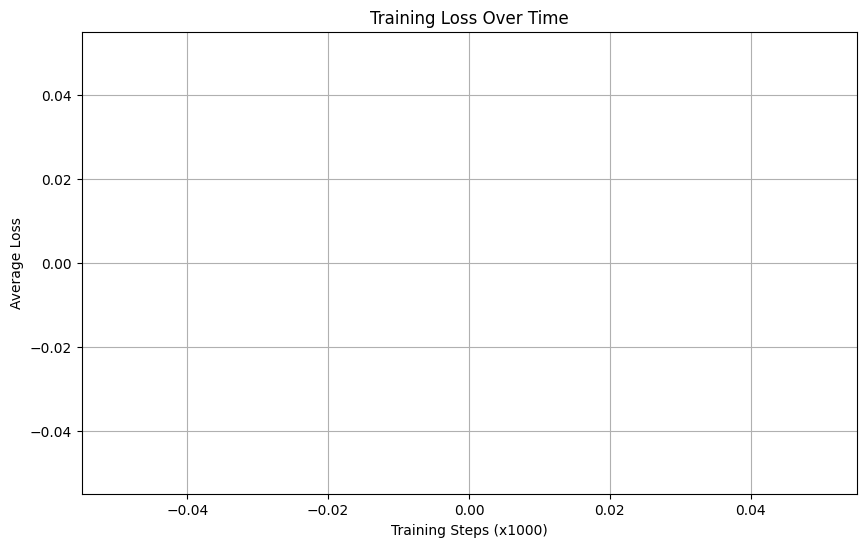

In [27]:
window_size = 1000  # adjust this value to get smoother/rougher plot
plt.figure(figsize=(10, 6))
losses = torch.tensor(lossi)
n = len(losses)
n_windows = n // window_size
averaged_losses = losses[:n_windows * window_size].view(-1, window_size).mean(1)


plt.plot(averaged_losses)
plt.xlabel(f'Training Steps (x{window_size})')
plt.ylabel('Average Loss')
plt.title('Training Loss Over Time')
plt.grid(True)
plt.show()
